<script type="text/x-mathjax-config">
MathJax.Hub.Config({
  TeX: { equationNumbers: { autoNumber: "AMS" } }
});
</script>

In [40]:
using LaTeXStrings, LinearAlgebra, Plots, Distributions, StatsBase, Random

# Macro II - PS III
## Marius Grünewald
### Q1

Before we dig into coding, let's solve the model. <br> 
When applying the functional forms of the utility and capital functions, the recursive problem can be stated as

$$
\begin{align}
V(k,z) = &\max_{k',\: l}\{ (1-\theta)\log(c) + \theta\log(1-l) + \beta E_{z'|z}V(k',z') \} \\
\text{s.t. } \: & c +  k' = e^zk^\alpha l^{1-\alpha} + (1-\delta)k  \\[4mm]
V(k,z) = &\max_{k',\: l}\{ (1-\theta)\log(e^zk^\alpha l^{1-\alpha} + (1-\delta)k - k') + \theta\log(1-l) + \beta E_{z'|z}V(k',z') \}
\end{align}
$$
The first order conditions can be stated as
$$
\begin{align}
\frac{\partial}{\partial k'} = 0 \implies \beta E_{z'|z}V_{k'}(k',z') = \frac{1-\theta}{e^zk^\alpha l^{1-\alpha} + (1-\delta)k - k'} \label{eq1}\tag{1}\\
\frac{\partial}{\partial l} = 0 \implies \frac{\theta}{1-l} = \frac{(1-\theta)e^zk^\alpha(1-\alpha)l^{-\alpha}}{e^zk^\alpha l^{1-\alpha} + (1-\delta)k - k'} \label{eq2}\tag{2}
\end{align}
$$
Equation ($\ref{eq2}$) is the new intertemporal condition which requires equal marginal utilities of labour and consumption. <br>
From the Envelope Theorem follows that
$$
\begin{align}
V_{k'}(k',z') = \frac{\alpha(1-\theta)e^{z'}k'^{\alpha-1}{l'}^{1-\alpha} + (1-\delta)}{e^{z'} {k'}^\alpha {l'}^{1-\alpha} + (1-\delta)k' - k''} \label{eq3}\tag{3}
\end{align}
$$
Combining equation ($\ref{eq1}$) and ($\ref{eq3}$), we get the standard Euler Equation.
$$
\begin{align}
\beta E_{z'|z} \Big( \frac{\alpha e^{z'}k'^{\alpha-1}{l'}^{1-\alpha} + (1-\delta)}{e^zk^\alpha l^{1-\alpha} + (1-\delta)k - k'} \Big)= \frac{1}{e^zk^\alpha l^{1-\alpha} + (1-\delta)k - k'} \label{eq4}\tag{4}
\end{align}
$$
To get to the steady-state, we set $k''=k'=k_{ss}$, $z'=z$ and $l'=l^{ss}$. Further, we know that there in this case there is no uncertainty, as the state $z$ never changes. This implies that $e^z = 1$ since each previous period perfectly predicts the current and the difference between both is zero. 
From ($\ref{eq4}$), it follows that
$$
\begin{align}
1 = \beta \big( \alpha k_{ss}^{\alpha-1}{l_{ss}}^{1-\alpha} + (1-\delta)\big) \\
\frac{1-\beta+\beta\delta}{\alpha\beta} = k_{ss}^{\alpha-1} \\
\frac{1}{{l_{ss}}^{1-\alpha}}\frac{1-\beta+\beta\delta}{\alpha\beta}  = k_{ss}^{\alpha-1}\\
{l_{ss}}^{\alpha-1} \frac{1-\beta+\beta\delta}{\alpha\beta}  = k_{ss}^{\alpha-1}\\
k_{ss} = \Big({\frac{1-\beta+\beta\delta}{\alpha\beta}}\Big)^{\frac{1}{\alpha-1}}l_{ss} \label{eq5}\tag{5}
\end{align}
$$
Now, we can go back to equation ($\ref{eq2}$) and plug in the steady-state value for kapital. This gives
$$
\begin{align}
\frac{(1-\theta)(1-\alpha)\frac{1-\beta(1-\delta)}{\alpha \beta}^{\frac{\alpha}{1-\alpha}}l_{ss}^{\alpha-\alpha}}{\frac{1-\beta(1-\delta)}{\alpha \beta}^{\frac{\alpha}{1-\alpha}}l_{ss}^{\alpha}l_{ss}^{1-\alpha} - \delta \frac{1-\beta(1-\delta)}{\alpha \beta}^{\frac{1}{1-\alpha}}l_{ss}} = \frac{\theta}{1-l_{ss}} \\
\frac{(1-\theta)(1-\alpha)\big(\frac{1-\beta(1-\delta)}{\alpha \beta}\big)^{\alpha}}{\big(\frac{1-\beta(1-\delta)}{\alpha \beta}\big)^{\alpha} - \delta}  = \frac{\theta l_{ss}}{1-l_{ss}} \\
\frac{(1-\theta)(1-\alpha)\big(\frac{1-\beta(1-\delta)}{\alpha \beta}\big)^{\alpha}}{\big(\frac{1-\beta(1-\delta)}{\alpha \beta}\big)^{\alpha} - \delta}  = \frac{\theta l_{ss}}{1-l_{ss}} \\
\frac{(1-\theta)(1-\alpha)}{\theta - \delta\theta\big( \frac{1-\beta(1-\delta)}{\alpha\beta} \big)} = \frac{l_{ss}}{1-l_{ss}} \\
l_{ss}\frac{\theta - \delta\theta\big( \frac{1-\beta(1-\delta)}{\alpha\beta} \big)}{(1-\theta)(1-\alpha)} = 1-l_{ss}\\
l_{ss} = \frac{(1-\theta)(1-\alpha)}{(1-\theta)(1-\alpha) + \theta - \delta\theta\big( \frac{1-\beta(1-\delta)}{\alpha\beta} \big)} \label{eq6}\tag{6}
\end{align}
$$


In [41]:
# Define parameters
theta = 0.64
alpha = 0.36
beta = 0.96
delta = 0.025
rho = 0.95
sigma = 0.007
tol = 0.001

# The steady-state labour and capital are therefore
l_ss = (1-alpha)*(1-theta)/ ((1-theta)*(1-alpha)+theta-delta*theta*((alpha*beta)/(1-beta*(1-delta))))
k_ss = (((alpha*beta))/(1-beta+delta*beta))^(1/(1-alpha))*l_ss
println("The steady-state labour is $l_ss")
println("The steady-state capital is $k_ss")

The steady-state labour is 0.2938775510204081
The steady-state capital is 4.097619819982137


In [42]:
# a)
# create a tensor to store labour decision
nkk = LinRange(0.5*k_ss, 2*k_ss, 400)
nzz = 1:12
labour_store = zeros(12, 400, 400)
util_store = zeros(12, 400, 400);

In [63]:
# Implement Tauchen

function Tauchen(nz=maximum(nzz), q=2, rho=rho, sigma=sigma)
    
    """ 
        Implementation of the discretization method for an continuous process as proposed by Tauchen (1986).
        Takes the number number different states, sigma and rho (relevant estimates of the AR(1) process)
        as inputs. The last input, q, is the number of standard deviations associated with the grid range.
        Outputs are the grid (z_grid) and the transition matrix (pi).
    """
    
    pi = zeros(nz,nz) # storage
    uncond_sd = sqrt(sigma^2/(1-rho^2)) #calculate unconditional std. dev.
    z_grid = LinRange(-q*uncond_sd, q*uncond_sd, nz) # set up grid
    step_size = (q*uncond_sd+q*uncond_sd)/(nz-1) # step-size
    
    # Create instance for every possible transition
    for i in nzz
        for j in nzz
            # Border probabilities differ - we need to make two exceptions
            # First exception
            if j == 1
                pi[i,j] = cdf(Normal(),(z_grid[j] + step_size/2 - rho*z_grid[i])/sigma)
                
            # Second exception
            elseif j == 12
                pi[i,j] = 1 - cdf(Normal(),(z_grid[j] - step_size/2 - rho*z_grid[i])/sigma)
                
            # Regular case
            else
                pi[i,j] = cdf(Normal(),(z_grid[j] + step_size/2 - rho*z_grid[i])/sigma) - cdf(Normal(),(z_grid[j] - step_size/2 - rho*z_grid[i])/sigma)
            end
        end
    end
    
    return pi, z_grid
end

Tauchen (generic function with 5 methods)

In [62]:
# optimal labour decision

function labour_decision(nzz=nzz, nkk=nkk, z_grid=z_grid, theta=theta, tol=tol, alpha=alpha, delta=delta, 
        labour_store=labour_store, util_store=util_store, max_iter=100)
    
    """  
    Function that determines the optimal labour supply for every possible combinations of z,k,k'. It takes
    the parameters, grids and pre-defined containers as inputs.
    The bisection is bounded by maximal iterations and the tolerance to ensure a break in explosive searches
    (for instance l_min > l_max).
    Any corner solution or labour decision outside the interval [0,1] is coded as -10000 utility for the
    particular combination. Otherwise, a santiy check for consumption is done and, if passed, the utility 
    is stored.
    """
    
    l_temp = []
    max_iter = max_iter
    
    # Loop through all possible combinations
    for z in nzz
        z_now = z_grid[z]

        for k in 1:length(nkk)
            k_now = nkk[k]

            for kn in 1:length(nkk)
                k_next = nkk[kn]
                
                # Set up necessary starters for the bisection
                l_max = 1
                l_min = 0
                error = 1
                count = 0
                
                # perform bisection
                while (error > tol) && (max_iter > count)
                    l_temp = (l_min + l_max)/2
                    rhs_temp = theta/(1-l_temp)
                    lhs_temp = (1-theta)*(1-alpha)*exp(z_now)*k_now^(alpha)*l_temp^(-alpha)/(exp(z_now)*k_now^alpha*l_temp^(1-alpha)+ (1-delta)*k_now - k_next)
                    
                    # Update bound for search
                    if lhs_temp < rhs_temp
                        l_max = copy(l_temp)
                    else
                        l_min = copy(l_temp)
                    end
                    #println(error, count)
                    # Calculate error
                    error = abs(rhs_temp - lhs_temp)
                    count = count + 1
                end
                # Store labour decision
                labour_store[z,k,kn] = l_temp
                
                # If corner solution or outside boundaries
                if (l_temp <= 0) || (l_temp >= 1)
                    
                    # Massive disutility so that the agent better "DROP IT LIKE IT'S HOT"
                    util_store[z,k,kn] = -100000
                    
                # If in interval    
                else
                    # Calculate consumption
                    c =  exp(z_now) * k_now^alpha * l_temp^(1-alpha) + (1-delta)*k_now - k_next
                    
                    # Avoid negative consumption
                    if c <= 0
                        util_store[z,k,kn] = -100000
                    
                    # Otherwise calculate regular utility
                    else
                        util_store[z,k,kn] = (1-theta)*log(c) + theta*log(1-l_temp)
                    end
                end
            

            end

        end    
    end
    
    # Return labour and utility
    return labour_store, util_store
end

labour_decision (generic function with 11 methods)

In [66]:
function value_fun_it(size_z=length(nzz), size_k=length(nkk),util_store=util_store, pi=pi,
        util_store_2=util_store_input, beta=beta, tol=tol)
    
    # Do the value function iteration dance
    # Create containers
    v_exp = zeros(size_z, size_k)
    V_store = zeros(size_z, size_k)
    policy_index = zeros(size_z, size_k)

    dist = 1
    iter = 0
    
    # Start optimization
    while dist > tol

        for z in 1:size_z

            for k in 1:size_k
                
                # Store all value functions for a given k and a given z - yields a vector with length 400
                v_temp = util_store_2[z,k,:]' + beta.*pi[z,:]'*v_exp
                
                # Find the maximum -> Optimal answer for a current state + capital combination
                V_store[z,k] = maximum(v_temp)
                
                # Save index as the policy index
                policy_index[z,k] = argmax(v_temp')[1]

            end
        end
        
        # Update distance
        dist = norm(V_store - v_exp)/norm(v_exp) 
        iter = iter + 1

        println("$dist, $iter ")
        # Update guess
        v_exp = copy(V_store)

    end
    
    return V_store, policy_index, iter
end

value_fun_it (generic function with 8 methods)

In [67]:
@time begin
pi, z_grid = Tauchen()    
labour_store, util_store_input = labour_decision()
V_store, policy_index, iter = value_fun_it()
end

Inf, 1 
0.4921214548817933, 2 
0.5247035378520493, 3 
0.5130754278460852, 4 
0.42456637027933275, 5 
0.33038795550723626, 6 
0.2586319176579246, 7 
0.20738272789714018, 8 
0.17042631537552036, 9 
0.14304619323173898, 10 
0.12217510963766173, 11 
0.1058508959092752, 12 
0.09279549059811622, 13 
0.08215350658531377, 14 
0.0733363188006837, 15 
0.06592800904168954, 16 
0.05962767610887154, 17 
0.05421283517044334, 18 
0.04951587586953264, 19 
0.04540831794943268, 20 
0.04179017967773981, 21 
0.03858256284935731, 22 
0.035722433948186263, 23 
0.03315887594372459, 24 
0.030850333064712864, 25 
0.02876256183689979, 26 
0.026867121631978123, 27 
0.025140191044648364, 28 
0.02356167744022797, 29 
0.022114526239600273, 30 
0.020784156998003716, 31 
0.019558047208819672, 32 
0.01842537948853125, 33 
0.017376758816676247, 34 
0.016403988262280733, 35 
0.015499890379779321, 36 
0.01465814769367552, 37 
0.013873181685116623, 38 
0.013140046078452108, 39 
0.012454341719167403, 40 
0.0118121427627645

([-10.779616633235854 -10.765858244842654 … -7.455359784007566 -7.4496197058765175; -10.752588846087017 -10.73887988807859 … -7.436169949441357 -7.430441514779024; … ; -10.395995997599908 -10.382721729935323 … -7.174929753016136 -7.16934705942108; -10.368350826936563 -10.355104210781759 … -7.1550411815887065 -7.149471111787128], [9.0 10.0 … 373.0 374.0; 10.0 11.0 … 374.0 375.0; … ; 13.0 14.0 … 378.0 379.0; 13.0 14.0 … 379.0 380.0], 96)

The value function takes 96 iterations to run. The overall time it takes to compute Transition Matrix, Labour Decision and Value Function is 18.5 seconds. <br>
(Your feedback in the previous problem set about efficiency made my code run significantly faster this time around, too. Thanks!)

In [68]:
# Find the labour decision associated with the optimal policy answer for different states.
labour_policy = zeros(12, 400)
for z in nzz
    for k in 1:length(nkk)
       labour_policy[z,k] = labour_store[z,k,Int.(policy_index[z,k])]
    end
end

In [69]:
# Do the simulation of capital sequence
Random.seed!(1234)

T = 50000

# Simulate sequence of shocks
z_path_index = ones(T)
for t in 2:T-1
    # draw form the index with the probabilities given by the transition matrix
    # Row is fixed in each draw and determined by previous draw
    z_path_index[t] = sample(nzz, Weights(pi[Int.(z_path_index[t-1]),:]))
end

capital_path_index = ones(T)
assets = zeros(T)
# Find capital accumulation
for t in 1:T-1
    # Find appropriate index of the policy function
    capital_path_index[t+1] = policy_index[Int.(z_path_index[t]), Int.(capital_path_index[t])]
    # Find grid point associated with the grid
    assets[t] = nkk[Int.(capital_path_index[t+1])]
end

In [ ]:
Now follow the graph

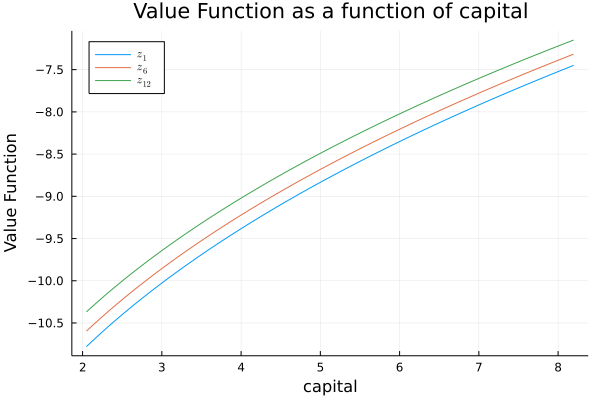

In [102]:
# Plot of the value function
plot(nkk, [V_store[1,:], V_store[6,:], V_store[12,:]], xlabel="capital", ylabel="Value Function",
    title="Value Function as a function of capital", label=[L"z_1" L"z_6" L"z_{12}"], legend=:topleft
)

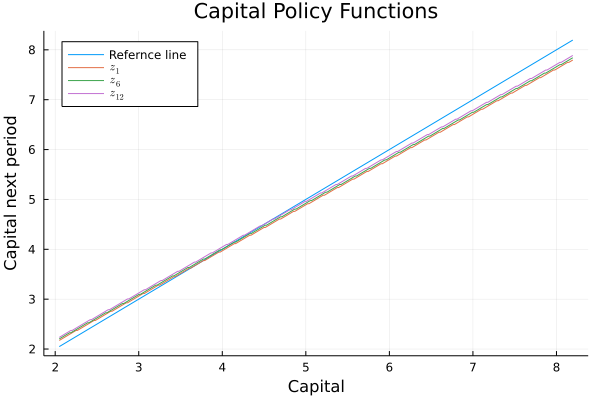

In [116]:
# Policy function of capital for the same three shocks
kapital_pol = nkk[Int.(policy_index)]
plot(nkk, [nkk, kapital_pol[1,:], kapital_pol[6,:], kapital_pol[12,:]], label=["Refernce line" L"z_1" L"z_6" L"z_{12}"],
xlabel="Capital", ylabel="Capital next period", title="Capital Policy Functions", legend=:topleft)

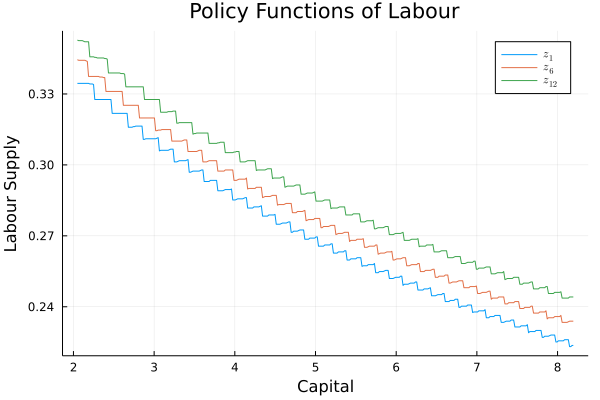

In [114]:
# Policy function of labour for the same three shocks
plot(nkk, [labour_policy[1,:], labour_policy[6,:], labour_policy[12,:]], label=[L"z_1" L"z_6" L"z_{12}"],
xlabel="Capital", ylabel="Labour Supply", title="Policy Functions of Labour")

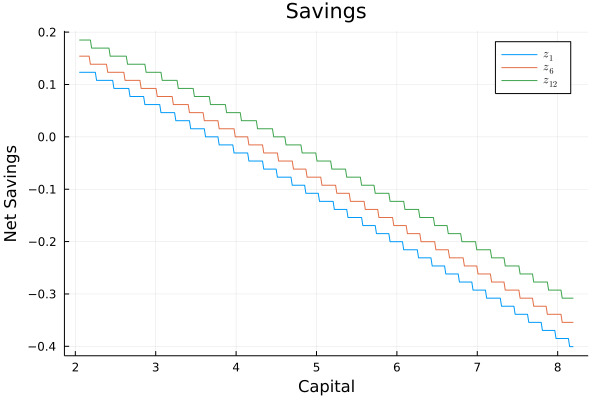

In [111]:
# plot of savings for the same three shocks
savings = zeros(12, 400)
for z in nzz
    savings[z,:] = kapital_pol[z,:]-nkk
end
plot(nkk, [savings[1,:], savings[6,:], savings[12,:]], label=[L"z_1" L"z_6" L"z_{12}"], title="Savings",
ylabel="Net Savings", xlabel="Capital")

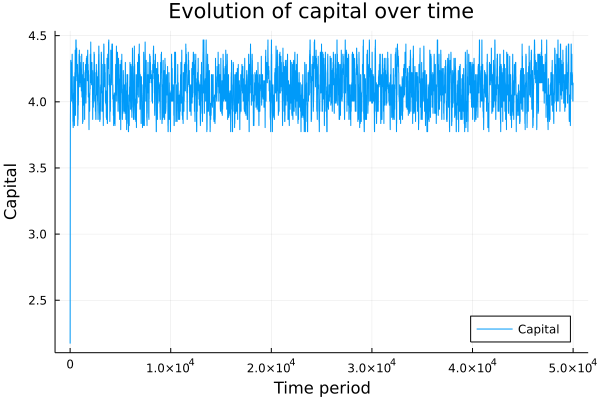

In [105]:
# simulation of capital
plot(assets[1:49999], title="Evolution of capital over time", legend=:bottomright, ylabel="Capital",
xlabel="Time period", label="Capital")

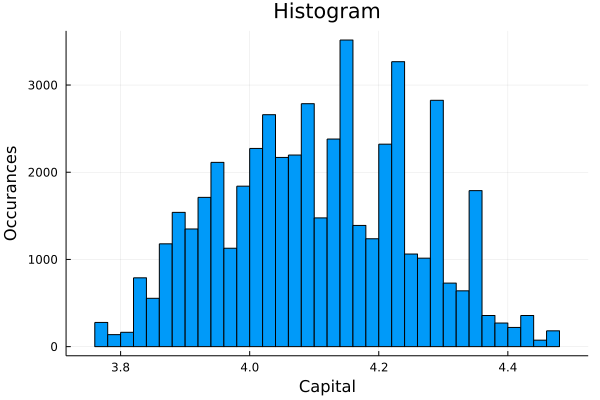

In [110]:
# stationary distribution of capital - I cut of the first periods of capital accumulation
histogram(assets[25:49999], xlabel="Capital", ylabel="Occurances", title="Histogram", legend=:false)